# Preprocesado de datos Regresión Logística

Usando el mismo dataset que usatéis ayer, los objetivos de los ejercicios de hoy son:

- Estandarizar las variables numéricas de vuestro set de datos
- Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.
- Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.
- Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/Churn_modelling_eda.csv", index_col = 0)
df_encoding = df.copy()

In [3]:
df_encoding.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df_encoding.select_dtypes(include = 'object')

,Geography,Gender
RowNumber,,
1,France,Female
2,Spain,Female
3,France,Female
4,France,Female
5,Spain,Female
...,...,...
9996,France,Male
9997,France,Male
9998,France,Female


- Orden de las variables:

        - Gender: Tiene orden 
        - Geography : No tiene orden

In [5]:
mapa_gender = {"Male": 1, "Female": 0}

In [6]:
df_encoding["gender_map"] = df_encoding["Gender"].map(mapa_gender)

In [7]:
dummies = pd.get_dummies(df["Geography"], dtype = int)
dummies.head(2)

,France,Germany,Spain
RowNumber,,,
1,1,0,0
2,0,0,1


In [8]:
df_encoded = pd.concat([df_encoding, dummies], axis = 1)

In [9]:
df_encoded.drop(["Gender", "Geography"], axis = 1, inplace = True)

In [10]:
df_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender_map,France,Germany,Spain
RowNumber,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
3,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,0,1,1,0,0
9997,516,35,10,57369.61,1,1,1,101699.77,0,1,1,0,0
9998,709,36,7,0.00,1,0,1,42085.58,1,0,1,0,0


In [11]:
df_encoded.to_csv("data/adults_enco.csv")

Estandarizamos nuestros datos con el método StandardScaler de Sklearn.

Estandarizamos nuestros datos

In [12]:
scaler = StandardScaler()

In [13]:
numericas = df_encoding.select_dtypes(include = np.number).drop(["gender_map", "Exited", "HasCrCard", "IsActiveMember"], axis =1)
numericas

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
RowNumber,,,,,,
1,619,42,2,0.00,1,101348.88
2,608,41,1,83807.86,1,112542.58
3,502,42,8,159660.80,3,113931.57
4,699,39,1,0.00,2,93826.63
5,850,43,2,125510.82,1,79084.10
...,...,...,...,...,...,...
9996,771,39,5,0.00,2,96270.64
9997,516,35,10,57369.61,1,101699.77
9998,709,36,7,0.00,1,42085.58


In [14]:
# ajustamos los datos
scaler.fit(numericas)

StandardScaler()

In [15]:
x_escaladas = scaler.transform(numericas)

In [16]:
# Convertimos le array a Df
numericas_estandar = pd.DataFrame(x_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534


In [17]:
df_enco_esta = pd.concat([ numericas_estandar.reset_index(),df_encoded.reset_index()], axis = 1)

In [35]:
df_enco_esta.head(2)

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,gender_map,France,Germany,Spain
0,0,1.246488,-1.518201,0.687130,1.276364,-0.911583,-0.471235,4428,771,23,7,156123.73,1,1,0,72990.62,0,1,0,0
1,1,0.667069,0.198164,1.032908,-0.324886,0.807737,-0.123595,191,715,41,8,56214.85,2,0,0,92982.61,0,1,0,0


In [36]:
df_enco_esta.isnull().sum()

Exited             0
CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
EstimatedSalary    0
RowNumber          0
CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
gender_map         0
France             0
Germany            0
Spain              0
dtype: int64

In [20]:
df_enco_esta.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender_map,France,Germany,Spain
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,1,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,3,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,4,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1


In [37]:
df_enco_esta.to_csv("data/adults_enco_esta.csv")

- Desbalanceo de los datos con Smotetomek

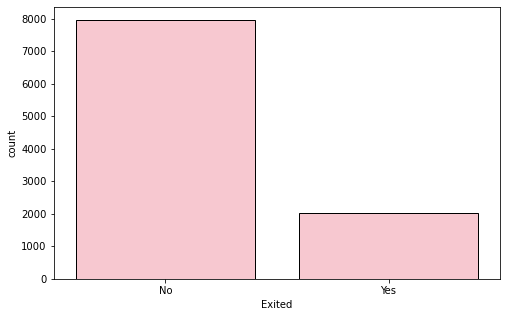

In [22]:
#Veamos la distribucion de nuestra variable respuesta para ver si es necesario realizar
#desbalanceo
plt.figure(figsize=(8,5)) 

fig1 = sns.countplot(data = df_enco_esta, x = "Exited",  color = "pink",  edgecolor='black')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show()

In [23]:
y = df_enco_esta['Exited']
X = df_enco_esta.drop('Exited', axis=1)

In [24]:
#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [25]:
# iniciamos el método
os_us = SMOTETomek()

# ajustamos el modelo
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

In [26]:
y_train.value_counts()

0    5604
1    1396
Name: Exited, dtype: int64

In [27]:
X_balanceo = pd.DataFrame(X_train_res)

In [28]:
y_balanceo = pd.DataFrame(y_train_res)

In [29]:
print (f"Distribution before resampling \n {y_train.value_counts()}" )
print("..............................................................")
print (f"Distribución después del ajuste \n {y_train_res.value_counts()}")

Distribution before resampling 
 0    5604
1    1396
Name: Exited, dtype: int64
..............................................................
Distribución después del ajuste 
 0    5087
1    5087
Name: Exited, dtype: int64


In [30]:
df_enco_esta = pd.concat([y_balanceo.reset_index(),X_balanceo.reset_index()], axis = 1)

In [31]:
df_enco_esta.drop("index", axis =1 , inplace = True)

In [32]:
df_enco_esta

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,gender_map,France,Germany,Spain
0,0,1.246488,-1.518201,0.687130,1.276364,-0.911583,-0.471235,4428,771,23,7,156123.730000,1,1,0,72990.620000,0,1,0,0
1,1,0.667069,0.198164,1.032908,-0.324886,0.807737,-0.123595,191,715,41,8,56214.850000,2,0,0,92982.610000,0,1,0,0
2,1,-1.733383,0.198164,-1.387538,0.670711,-0.911583,1.096511,3939,483,41,1,118334.440000,1,0,0,163147.990000,1,0,1,0
3,1,-0.191713,0.484225,-0.695982,0.918482,-0.911583,-1.138686,3304,632,44,3,133793.890000,1,1,1,34607.140000,0,1,0,0
4,0,-0.150326,-0.469311,-0.695982,-1.225848,0.807737,-0.962203,1767,636,34,3,0.000000,2,1,1,44756.250000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10169,1,-1.483205,0.552592,0.068969,-0.123951,-0.668286,1.609277,2854,507,44,5,68752.024092,1,1,0,192635.947067,1,1,0,0
10170,1,0.068460,0.497417,1.126165,0.970694,3.409299,-0.419519,3095,657,44,8,137051.618225,3,1,0,75964.687447,0,1,0,0
10171,1,0.461621,-0.381877,0.228668,1.548343,1.615209,0.299114,7006,695,34,5,173093.619404,2,0,0,117291.561583,1,0,0,0
10172,1,-1.278843,0.752802,0.237173,-0.162695,-0.911583,1.615750,2866,526,46,5,66334.676729,1,1,0,193008.189361,0,1,0,0


In [33]:
df_enco_esta.to_csv("data/adults_esta_enco_balanceo.csv")